In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os
from six.moves import urllib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import mysql.connector as connection

In [3]:
download_dir = "./data/"

os.makedirs(download_dir, exist_ok=True)

download_url ="https://raw.githubusercontent.com/mohitmahiyt/CarPricePredictionDataset/main/cars_dataset.csv"

filename = os.path.basename(download_url)
print(filename)

download_file_path = os.path.join(download_dir,filename)
\
print(download_file_path)

urllib.request.urlretrieve(download_url, download_file_path)



cars_dataset.csv
./data/cars_dataset.csv


('./data/cars_dataset.csv', <http.client.HTTPMessage at 0x18f6f34a6a0>)

In [4]:
df=pd.read_csv("D:\carpricepridiction\data\cars_dataset.csv")
df

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,1,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,2,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,3,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,4,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,5,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,30016,Bentley Continental,Bentley,Continental,10,30000,Dealer,Petrol,Automatic,8.60,5998,552.0,4,8100000
15407,30017,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.20,6592,563.0,4,24200000
15408,30018,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.00,5998,600.0,5,5200000
15409,30019,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.00,3855,601.0,4,39500000


In [5]:
df['unnamed:0']=range(1,len(df)+1)
df.rename(columns={'unnmaed:0','car_id'},inplace=true)
df

NameError: name 'true' is not defined

In [ ]:
try:
    conn = connection.connect(user='root', password='2536')
    query="create database if not exists car_database;"
    cursor = conn.cursor()
    cursor.execute(query)
    conn.commit()
except Exception as e:
    print(e)
else:
    print('connected')
    print("database created successfully")
finally:
    conn.close()
try:
    conn = connection.connect(user='root', password='2536', database="car_database")
    query="""create table if not exists car_dataset(
car_name varchar(30),
brand varchar(30),
model varchar(30),
vehicle_age int,
km_driven int,
seller_type varchar(30),
fuel_type varchar(30),
transmission_type varchar(30),
mileage float,
engine int,
max_power float,
seats int,
selling_price bigint);"""

    cursor = conn.cursor()
    cursor.execute(query)
    conn.commit()
except Exception as e:
  print(e)
else:
    print('connected')
    print("table created successfully")
finally:
   conn.close()


connected
database created successfully
connected
table created successfully


In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,unnamed:0
0,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000,1
1,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000,2
2,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000,3
3,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000,4
4,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Bentley Continental,Bentley,Continental,10,30000,Dealer,Petrol,Automatic,8.60,5998,552.0,4,8100000,15407
15407,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.20,6592,563.0,4,24200000,15408
15408,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.00,5998,600.0,5,5200000,15409
15409,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.00,3855,601.0,4,39500000,15410


In [ ]:
try:
    conn = connection.connect(user='root', password='2536', database="car_database")
    query="""truncate car_dataset;"""
    cursor = conn.cursor()
    cursor.execute(query)
    conn.commit()

    query = f"""truncate car_dataset;"""
    cursor = conn.cursor()
    cursor.execute(query)        
    conn.commit()
    for key, value in df.iterrows():
        car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price = value[0],value[1], value[2], value[3], value[4],value[5] ,value[6],value[7] ,value[8] ,value[9] ,value[10] ,value[11] ,value[12] 
        
        query = f"""insert into car_dataset values ('{car_name}','{brand}', '{model}',{vehicle_age},{km_driven},'{seller_type}','{fuel_type}','{transmission_type}',{mileage},{engine},{max_power},{seats},{selling_price});"""
        cursor = conn.cursor()
        cursor.execute(query)
    conn.commit()

except Exception as e:
    print(e)
else:
    print('connected')
    print("table created successfully")
finally:
    conn.close()

connected
table created successfully


In [ ]:
df.describe(include='object')

,car_name,brand,model,seller_type,fuel_type,transmission_type
count,15411,15411,15411,15411,15411,15411
unique,121,32,120,3,5,2
top,Hyundai i20,Maruti,i20,Dealer,Petrol,Manual
freq,906,4992,906,9539,7643,12225


In [ ]:

numerical_features= [feature for feature in df.columns if df[feature].dtype !='0'   ]
categorial_features= [feature for feature in df.columns if df[feature].dtype !='0'   ]
print(f"there are {len(numerical_features)} numerical features named:{numerical_features}")
print(f"there are {len(categorial_features)} categorial features named:{categorial_features}")

there are 15 numerical features named:['Unnamed: 0', 'car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power', 'seats', 'selling_price', 'unnamed:0']
there are 15 categorial features named:['Unnamed: 0', 'car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power', 'seats', 'selling_price', 'unnamed:0']


In [ ]:
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,unnamed:0
0,1,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000,1
1,2,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000,2
2,3,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000,3
3,4,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000,4
4,5,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000,5


In [ ]:
df.tail()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,unnamed:0
15406,30016,Bentley Continental,Bentley,Continental,10,30000,Dealer,Petrol,Automatic,8.6,5998,552.0,4,8100000,15407
15407,30017,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.2,6592,563.0,4,24200000,15408
15408,30018,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.0,5998,600.0,5,5200000,15409
15409,30019,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.0,3855,601.0,4,39500000,15410
15410,30020,Bentley Continental,Bentley,Continental,9,9000,Dealer,Petrol,Automatic,9.5,5998,626.0,4,14500000,15411


In [ ]:
df.shape

(15411, 15)

In [ ]:
pd.Categorical(df['car_name'])

['Maruti Alto', 'Maruti Alto', 'Maruti Alto', 'Maruti Alto', 'Maruti Alto', ..., 'Bentley Continental', 'Rolls-Royce Ghost', 'Bentley Continental', 'Ferrari GTC4Lusso', 'Bentley Continental']
Length: 15411
Categories (121, object): ['Audi A4', 'Audi A6', 'Audi A8', 'Audi Q7', ..., 'Volvo S90', 'Volvo XC', 'Volvo XC60', 'Volvo XC90']

In [ ]:
df.isnull().mean()

Unnamed: 0           0.0
car_name             0.0
brand                0.0
model                0.0
vehicle_age          0.0
km_driven            0.0
seller_type          0.0
fuel_type            0.0
transmission_type    0.0
mileage              0.0
engine               0.0
max_power            0.0
seats                0.0
selling_price        0.0
unnamed:0            0.0
dtype: float64

In [ ]:


for col in categorial_features:
  print(df[col].value_counts(normalize=True))

Unnamed: 0
1        0.000065
13208    0.000065
13103    0.000065
13105    0.000065
13106    0.000065
           ...   
6527     0.000065
6528     0.000065
6529     0.000065
6530     0.000065
30020    0.000065
Name: proportion, Length: 15411, dtype: float64
car_name
Hyundai i20           0.058789
Maruti Swift Dzire    0.057751
Maruti Swift          0.050678
Maruti Alto           0.050483
Honda City            0.049121
                        ...   
Maserati Ghibli       0.000065
Hyundai Aura          0.000065
Force Gurkha          0.000065
Isuzu MUX             0.000065
Ferrari GTC4Lusso     0.000065
Name: proportion, Length: 121, dtype: float64
brand
Maruti           0.323924
Hyundai          0.193498
Honda            0.096360
Mahindra         0.065602
Toyota           0.051457
Ford             0.051262
Volkswagen       0.040231
Renault          0.034780
BMW              0.028486
Tata             0.027902
Mercedes-Benz    0.021867
Skoda            0.021673
Audi             0.012459
Dat

In [ ]:
for i in range(len(numerical_features))

In [ ]:

#split numerical and categorical features
numerical_features=[feature for feature in df.columns if df[feature].dtype !='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']
print(f"there are {len(numerical_features)} numerical features named :{numerical_features}")
print(f"there are {len(categorical_features)} categorical features named :{categorical_features}")
df.isnull().sum()
df.isnull().mean()

there are 9 numerical features named :['Unnamed: 0', 'vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price', 'unnamed:0']
there are 6 categorical features named :['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


Unnamed: 0           0.0
car_name             0.0
brand                0.0
model                0.0
vehicle_age          0.0
km_driven            0.0
seller_type          0.0
fuel_type            0.0
transmission_type    0.0
mileage              0.0
engine               0.0
max_power            0.0
seats                0.0
selling_price        0.0
unnamed:0            0.0
dtype: float64

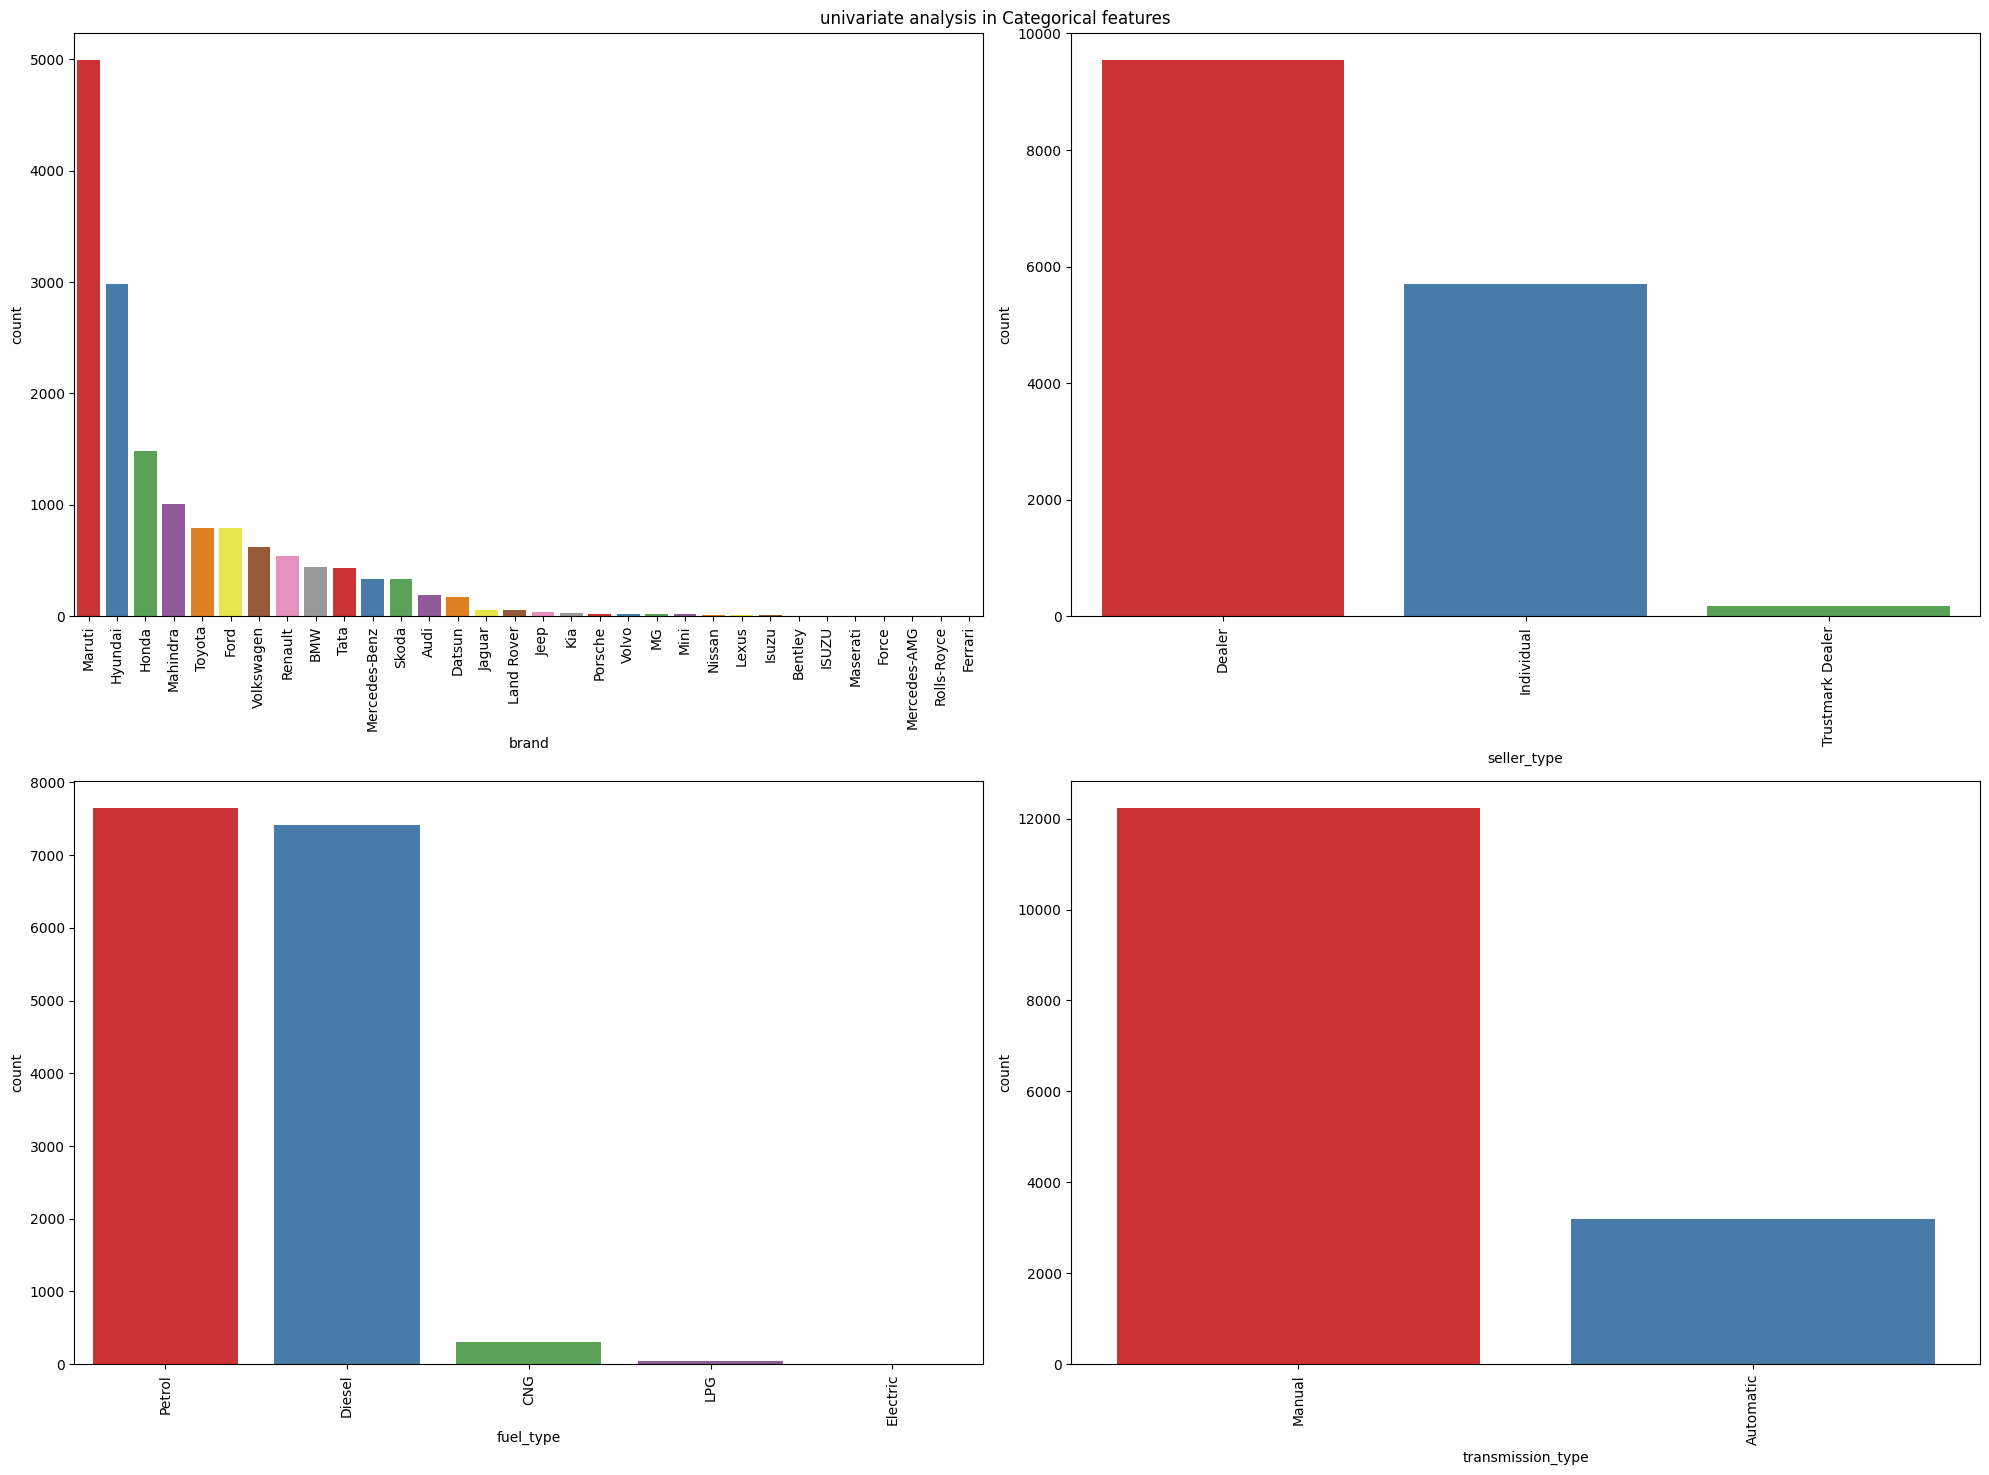

In [ ]:
plt.figure(figsize= (20,15))
plt.suptitle("univariate analysis in Categorical features")
cat = ["brand", "seller_type", "fuel_type", "transmission_type"]
for i in range(len(cat)) :
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cat[i]],palette='Set1', order=df[cat[i]].value_counts().index)
    plt.xticks(rotation=90)
    plt.xlabel(cat[i])
    plt.tight_layout()

<Figure size 1500x1500 with 0 Axes>

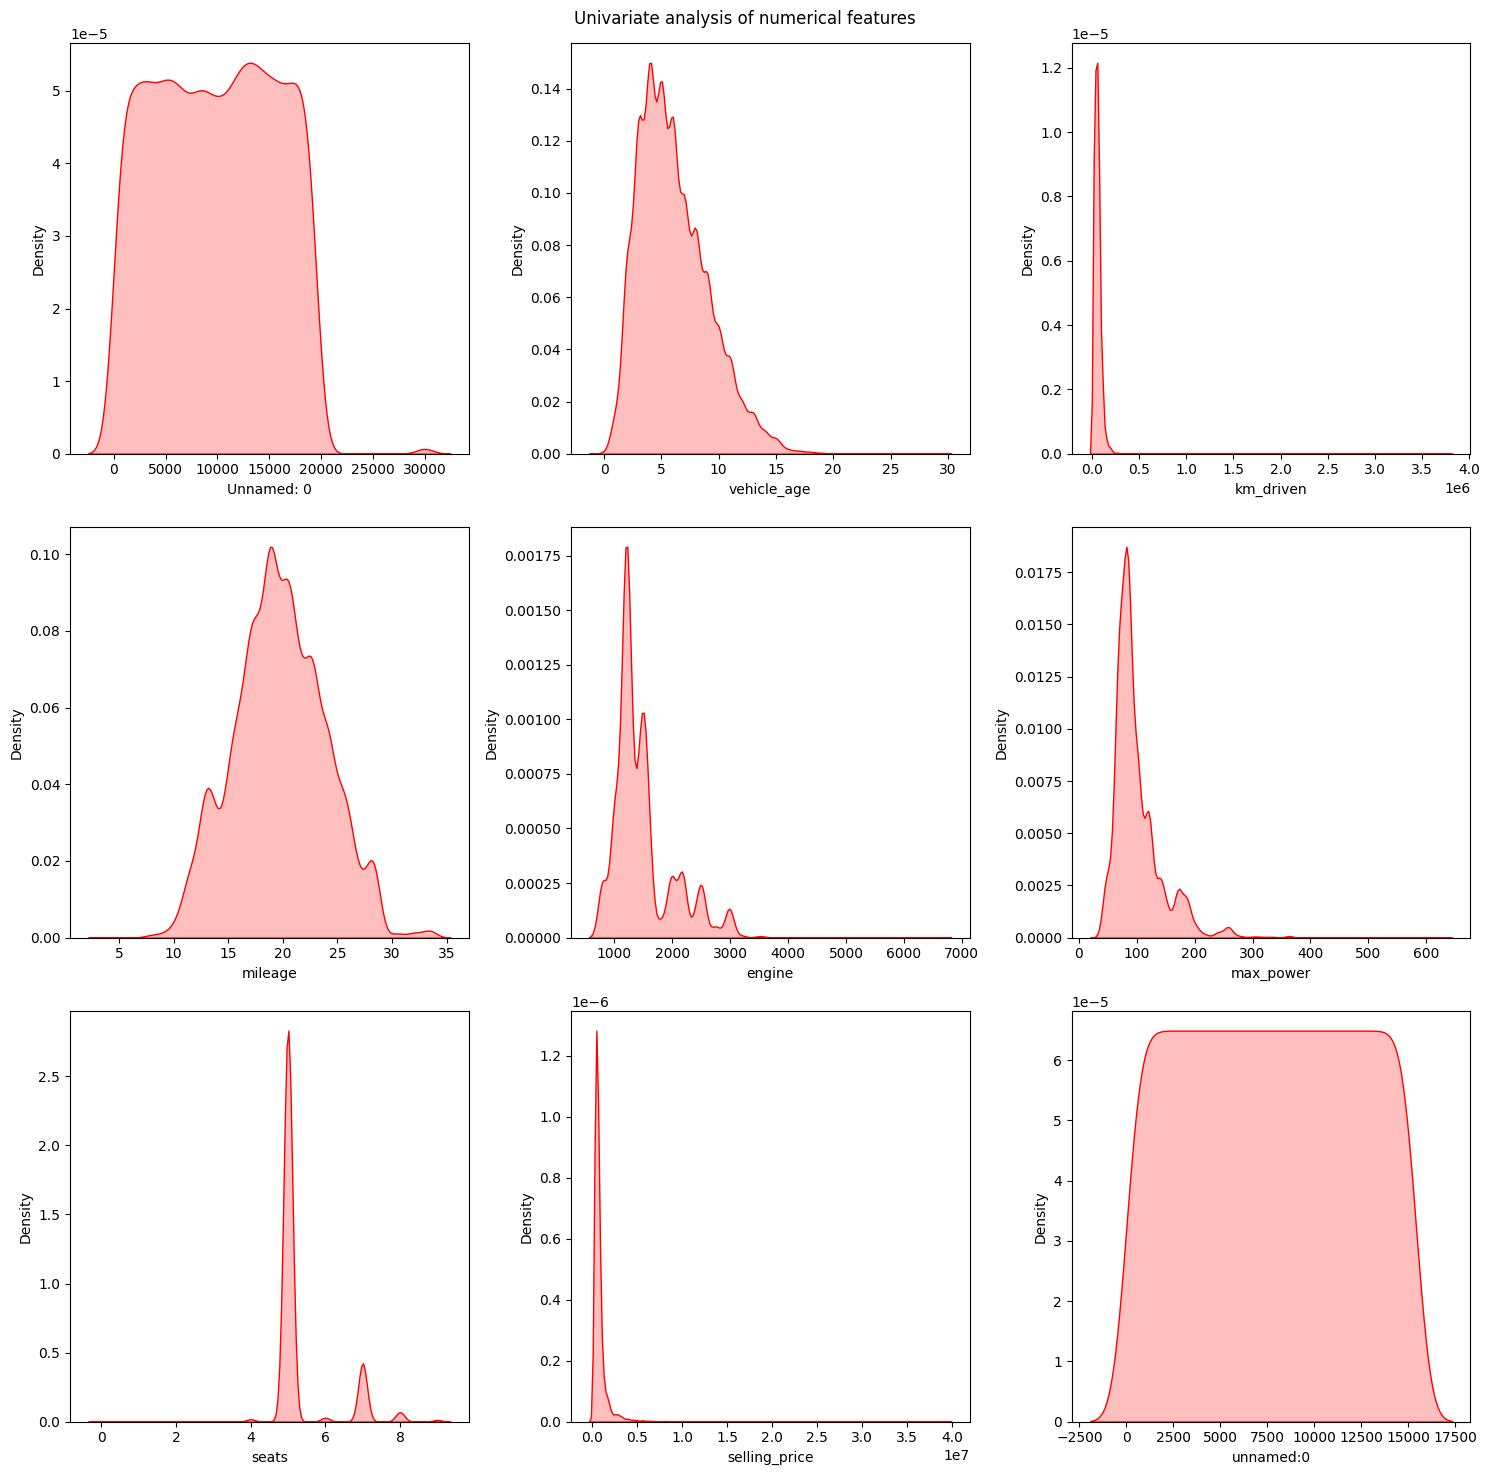

<Figure size 1500x1500 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate analysis of numerical features")

for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(x= df[numerical_features[i]], color='r', shade =True)
    plt.xlabel(numerical_features[i])
    plt.tight_layout()
plt.figure(figsize=(15,15))



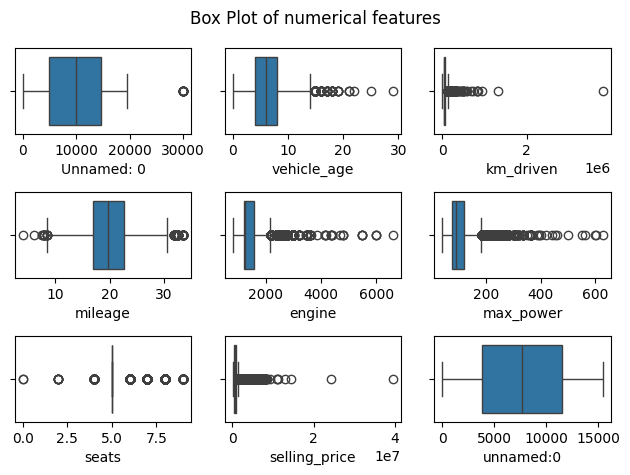

In [ ]:
plt.suptitle("Box Plot of numerical features")

for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x= df[numerical_features[i]])
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

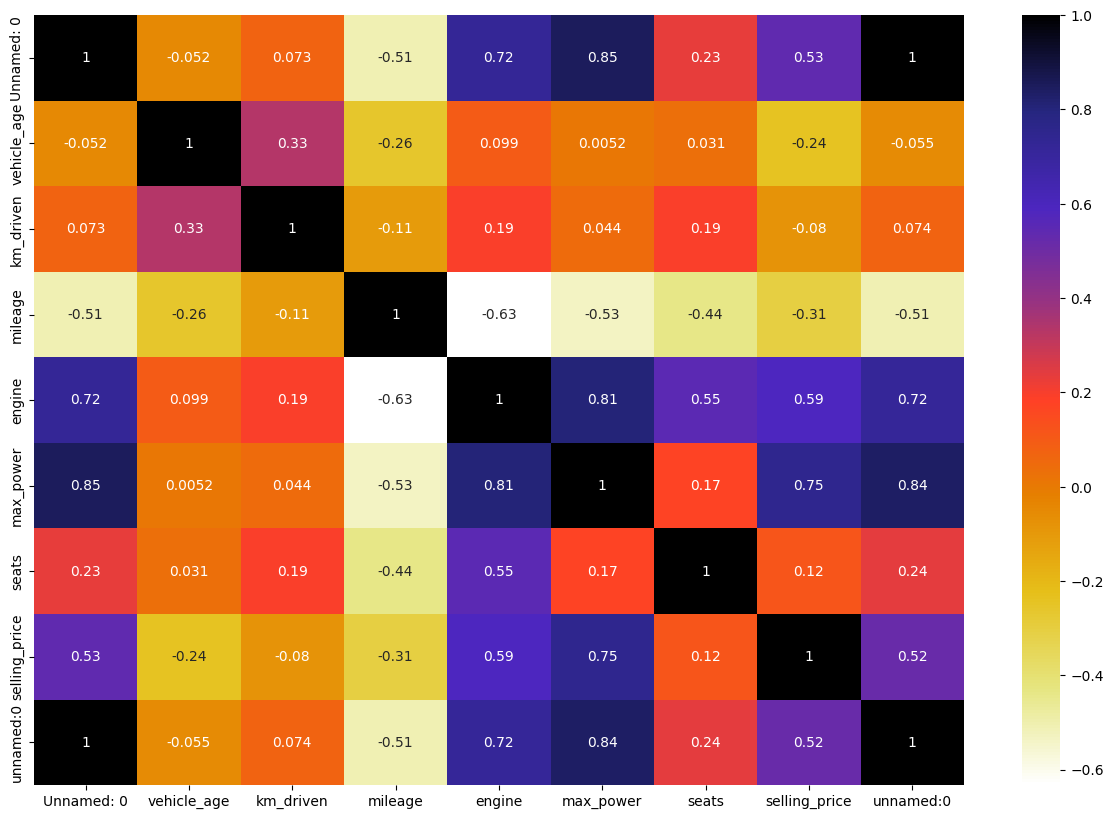

In [ ]:
plt.figure(figsize = (15,10))
#sns.heatmap(df.corr(), cmap="CMRmap_r", annot=True)
sns.heatmap(df[numerical_features].corr(), cmap="CMRmap_r",annot=True)
plt.show()

In [ ]:
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print()
    print("----"*50)
    print()

car_name
Hyundai i20           5.878918
Maruti Swift Dzire    5.775096
Maruti Swift          5.067809
Maruti Alto           5.048342
Honda City            4.912076
                        ...   
Maserati Ghibli       0.006489
Hyundai Aura          0.006489
Force Gurkha          0.006489
Isuzu MUX             0.006489
Ferrari GTC4Lusso     0.006489
Name: proportion, Length: 121, dtype: float64

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

brand
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW               2.848615
Tata              2.790215
Mercedes-Benz     2.186750
Skoda             2.167283
Audi              1.245863
Datsun            1.103108
Jaguar           

In [6]:
df['selling_price']

0          235000
1          185000
2          150000
3          172000
4          125000
           ...   
15406     8100000
15407    24200000
15408     5200000
15409    39500000
15410    14500000
Name: selling_price, Length: 15411, dtype: int64

(0.0, 3000000.0)

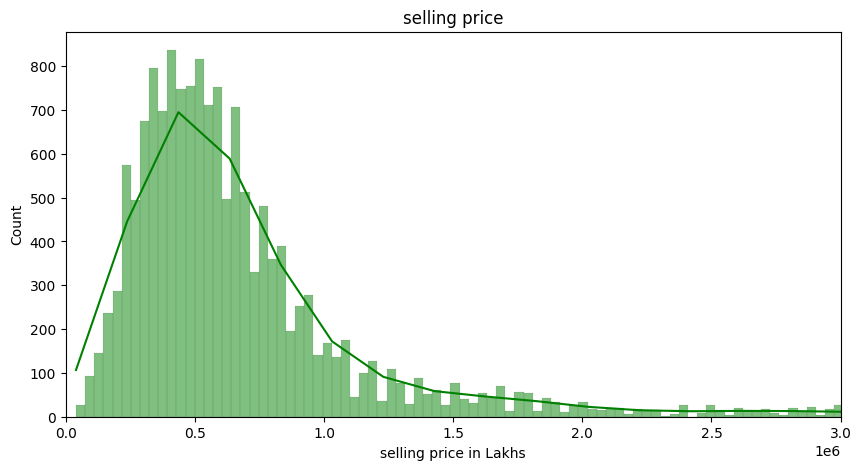

In [7]:
plt.figure(figsize=(10,5))
sns.histplot(df["selling_price"], kde=True,color='g')
plt.title("selling price")
plt.xlabel('selling price in Lakhs')
plt.xlim(0,3000000)

In [8]:
# most cars sold on dataset
df["car_name"].value_counts()

car_name
Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
                     ... 
Maserati Ghibli         1
Hyundai Aura            1
Force Gurkha            1
Isuzu MUX               1
Ferrari GTC4Lusso       1
Name: count, Length: 121, dtype: int64

In [9]:
# top 10 most cars sold on cars_dataset
df["car_name"].value_counts()[0:10]

car_name
Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: count, dtype: int64

In [10]:
df["car_name"].value_counts().head(10)

car_name
Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: count, dtype: int64

In [11]:
df["car_name"].value_counts().index[0:10]

Index(['Hyundai i20', 'Maruti Swift Dzire', 'Maruti Swift', 'Maruti Alto',
       'Honda City', 'Maruti Wagon R', 'Hyundai Grand', 'Toyota Innova',
       'Hyundai Verna', 'Hyundai i10'],
      dtype='object', name='car_name')

In [12]:
df["car_name"].value_counts().head(10).index

Index(['Hyundai i20', 'Maruti Swift Dzire', 'Maruti Swift', 'Maruti Alto',
       'Honda City', 'Maruti Wagon R', 'Hyundai Grand', 'Toyota Innova',
       'Hyundai Verna', 'Hyundai i10'],
      dtype='object', name='car_name')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Hyundai i20'),
  Text(1, 0, 'Maruti Swift Dzire'),
  Text(2, 0, 'Maruti Swift'),
  Text(3, 0, 'Maruti Alto'),
  Text(4, 0, 'Honda City'),
  Text(5, 0, 'Maruti Wagon R'),
  Text(6, 0, 'Hyundai Grand'),
  Text(7, 0, 'Toyota Innova'),
  Text(8, 0, 'Hyundai Verna'),
  Text(9, 0, 'Hyundai i10')])

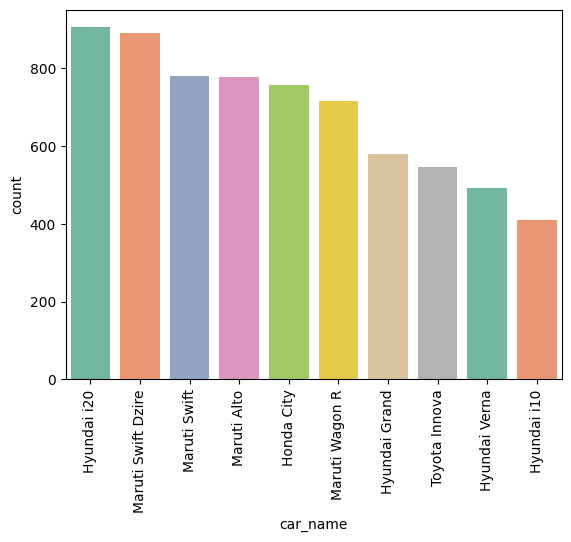

In [13]:
sns.countplot(x="car_name",palette="Set2", data = df, order=df["car_name"].value_counts().head(10).index)
plt.xticks(rotation = 90)

In [14]:
# mean of i20 to find one car price
i20 = df[df["car_name"] == 'Hyundai i20']
selling_price_i20 = i20.selling_price.mean()
print("the average mean price of i20 is", selling_price_i20)
av_share_i20 = df["car_name"].value_counts(normalize=True)*100
print("the average share of hyundai i20 is", round(av_share_i20[0],2), "%")

the average mean price of i20 is 543603.7527593819
the average share of hyundai i20 is 5.88 %


# most sold car by brand

In [15]:
df.brand.value_counts().head(10)

brand
Maruti        4992
Hyundai       2982
Honda         1485
Mahindra      1011
Toyota         793
Ford           790
Volkswagen     620
Renault        536
BMW            439
Tata           430
Name: count, dtype: int64

<Axes: xlabel='brand', ylabel='count'>

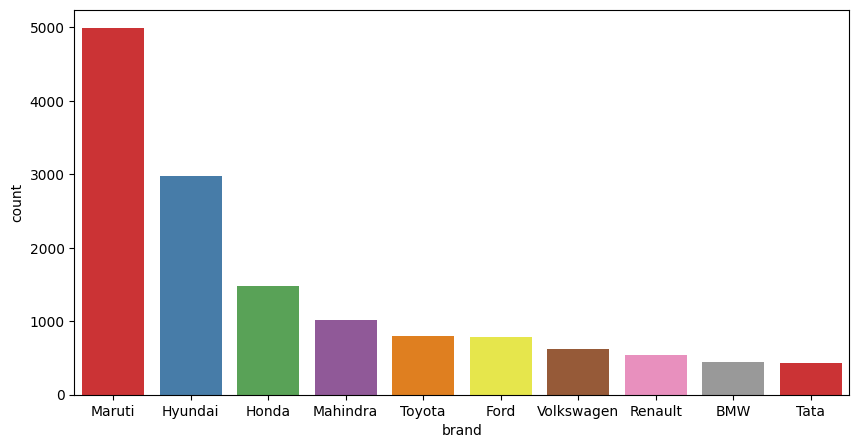

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x = "brand", data = df, palette="Set1",order=df["brand"].value_counts().head(10).index)

In [17]:
# average mean of maruti brand

maruti = df[df['brand'] == "Maruti"]
maruti["selling_price"].mean()


487089.3179086539

In [18]:
# Top most costlier brand on 
max_brand_price= df.groupby('brand').selling_price.max()
max_brand_name = df[df["selling_price"]==max_brand_price.max()]
max_brand_name['brand']

15409    Ferrari
Name: brand, dtype: object

In [19]:
# Top 10 most costlier brand on 
max_brand_price= df.groupby('brand').selling_price.max()
top_10_expensive_cars=max_brand_price.sort_values(ascending=False).head(10)
top_10_expensive_cars


brand
Ferrari          39500000
Rolls-Royce      24200000
Bentley          14500000
Mercedes-Benz    13000000
Porsche          11100000
Land Rover        9200000
BMW               8500000
Volvo             8195000
Lexus             8000000
Audi              6800000
Name: selling_price, dtype: int64

In [20]:
df[df["selling_price"]==max_brand_price.max()]['brand']

15409    Ferrari
Name: brand, dtype: object

In [21]:
max_brand_price= df.groupby('brand').selling_price.max()


In [22]:
m = max_brand_price.sort_values(ascending=False)[:10:]
m.index

Index(['Ferrari', 'Rolls-Royce', 'Bentley', 'Mercedes-Benz', 'Porsche',
       'Land Rover', 'BMW', 'Volvo', 'Lexus', 'Audi'],
      dtype='object', name='brand')

<Axes: xlabel='brand', ylabel='selling_price'>

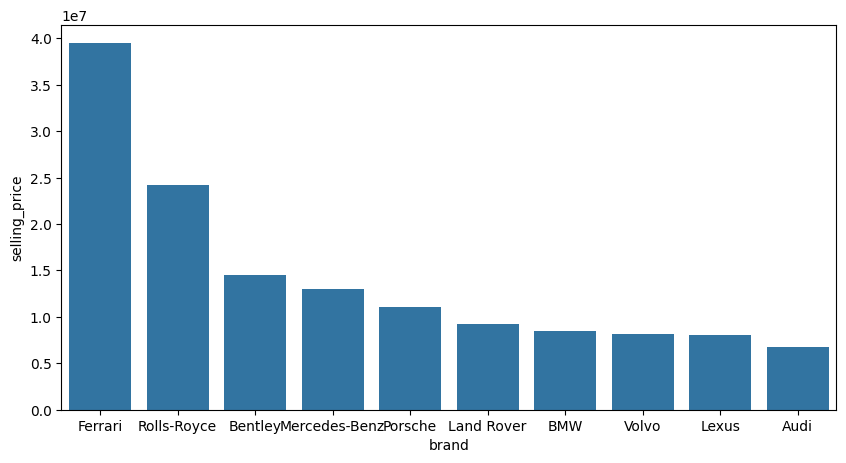

In [23]:
plt.figure(figsize=(10,5))
top_10 = top_10_expensive_cars.to_frame()
# print(top_10)
sns.barplot(x = top_10.index, y = top_10['selling_price'])


In [24]:
car = df.groupby('car_name').selling_price.max()
car = car.to_frame().sort_values('selling_price',ascending=False)[:10]
car

,selling_price
car_name,
Ferrari GTC4Lusso,39500000
Rolls-Royce Ghost,24200000
Bentley Continental,14500000
Mercedes-Benz S-Class,13000000
Porsche Cayenne,11100000
Land Rover Rover,9200000
BMW 7,8500000
BMW Z4,8250000
Volvo XC,8195000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Ferrari GTC4Lusso'),
  Text(1, 0, 'Rolls-Royce Ghost'),
  Text(2, 0, 'Bentley Continental'),
  Text(3, 0, 'Mercedes-Benz S-Class'),
  Text(4, 0, 'Porsche Cayenne'),
  Text(5, 0, 'Land Rover Rover'),
  Text(6, 0, 'BMW 7'),
  Text(7, 0, 'BMW Z4'),
  Text(8, 0, 'Volvo XC'),
  Text(9, 0, 'BMW X5')])

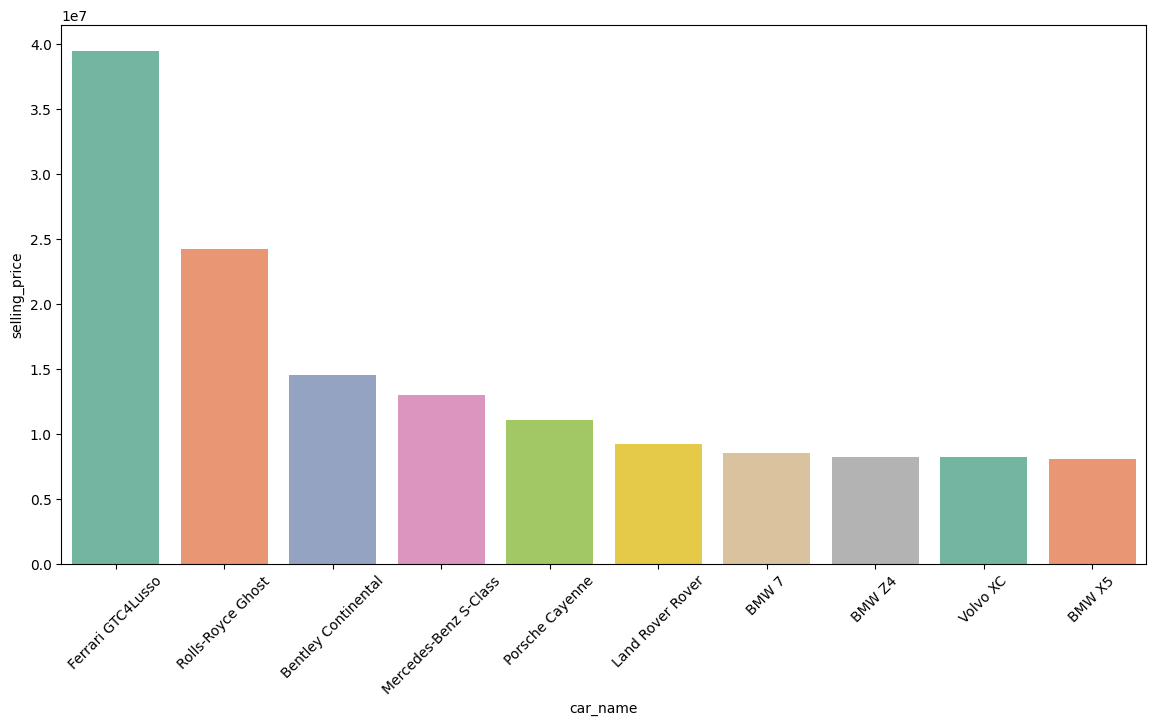

In [25]:
plt.figure(figsize=(14,7))

sns.barplot(x = car.index, y = car['selling_price'], palette="Set2")
plt.xticks(rotation=45)

<Axes: xlabel='vehicle_age', ylabel='km_driven'>

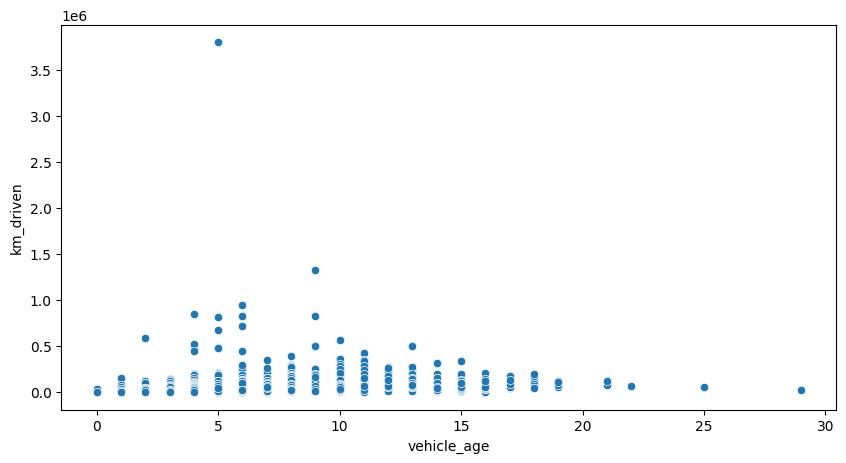

In [26]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['vehicle_age'], y=df['km_driven'])

In [27]:
max_km_driven= df.km_driven.max()
index = df[df["km_driven"]==max_km_driven.max()].index
index[0]
#df.drop(index[0], inplace=True)

13314

In [28]:
df[df["km_driven"]==max_km_driven]

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,unnamed:0
13314,16892,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.0,2179,140.0,7,1225000,13315


<Axes: xlabel='km_driven', ylabel='vehicle_age'>

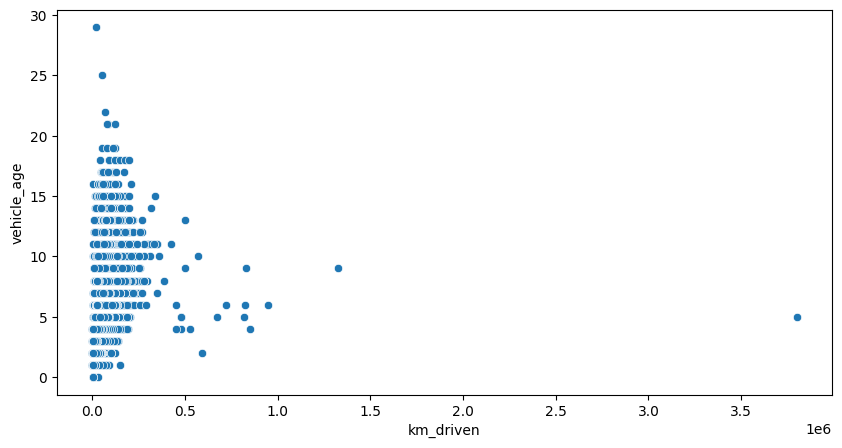

In [29]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['km_driven'],y=df['vehicle_age'])

In [30]:
# top 10 mileage based on brand on 
mileage=df.groupby('brand')['mileage'].mean().sort_values(ascending=False).head(15)
mileage.to_frame()

,mileage
brand,
Maruti,22.430980
Renault,22.099142
Datsun,21.215647
Lexus,20.846000
Ford,19.922620
Honda,19.908795
Maserati,19.820000
Tata,19.755279
Hyundai,19.588776


Text(0, 0.5, 'Mileage in kmpl')

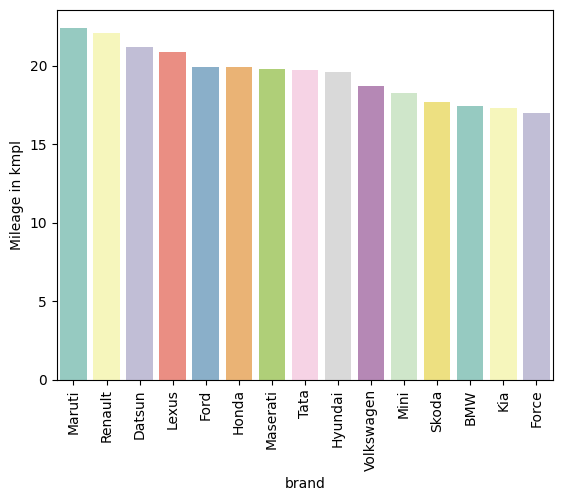

In [31]:
sns.barplot(x=mileage.index,y = mileage.values, palette='Set3')
plt.xticks(rotation= 90)
plt.ylabel('Mileage in kmpl')

In [32]:
# most milage car

mileage_car = df.groupby('car_name')['mileage'].mean().sort_values(ascending=False).head(10)
mileage_car.to_frame()

,mileage
car_name,
Tata Tiago,24.625103
Maruti Ciaz,24.289046
Maruti Vitara,24.231932
Renault KWID,24.037810
Maruti Celerio,23.703502
Maruti Dzire VXI,23.512941
Maruti Dzire LXI,23.260000
Maruti Dzire ZXI,23.260000
Ford Aspire,22.993846


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Tata Tiago'),
  Text(1, 0, 'Maruti Ciaz'),
  Text(2, 0, 'Maruti Vitara'),
  Text(3, 0, 'Renault KWID'),
  Text(4, 0, 'Maruti Celerio'),
  Text(5, 0, 'Maruti Dzire VXI'),
  Text(6, 0, 'Maruti Dzire LXI'),
  Text(7, 0, 'Maruti Dzire ZXI'),
  Text(8, 0, 'Ford Aspire'),
  Text(9, 0, 'Maruti Swift')])

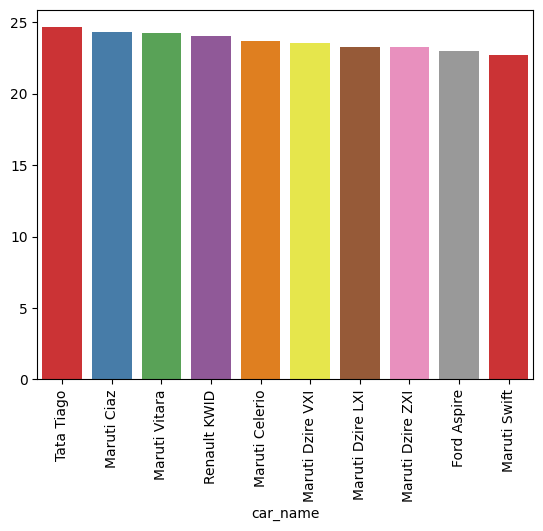

In [33]:
sns.barplot(x=mileage_car.index,y=mileage_car.values, palette='Set1')
plt.xticks(rotation= 90)

# km_driven vs selling price

(-10000.0, 10000000.0)

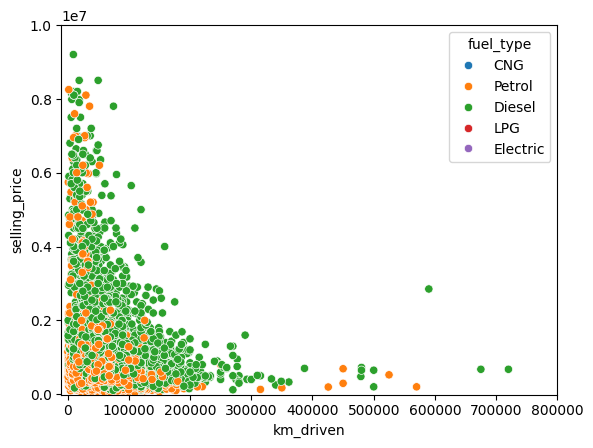

In [34]:
sns.scatterplot(x=df['km_driven'],y=df['selling_price'], data=df, hue="fuel_type")
plt.xlim(-10000,800000)
plt.ylim(-10000,10000000)

In [35]:
brand_price= df.groupby('brand').selling_price.mean().sort_values(ascending=False)
brand_price.to_frame()

,selling_price
brand,
Ferrari,3.950000e+07
Rolls-Royce,2.420000e+07
Bentley,9.266667e+06
Maserati,6.100000e+06
Porsche,5.161190e+06
Lexus,5.146500e+06
Mercedes-AMG,5.100000e+06
Land Rover,3.823902e+06
Volvo,3.729700e+06


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, 'Ferrari'),
  Text(1, 0, 'Rolls-Royce'),
  Text(2, 0, 'Bentley'),
  Text(3, 0, 'Maserati'),
  Text(4, 0, 'Porsche'),
  Text(5, 0, 'Lexus'),
  Text(6, 0, 'Mercedes-AMG'),
  Text(7, 0, 'Land Rover'),
  Text(8, 0, 'Volvo'),
  Text(9, 0, 'BMW'),
  Text(10, 0, 'Jaguar'),
  Text(11, 0, 'Mercedes-Benz'),
  Text(12, 0, 'Mini'),
  Text(13, 0, 'Audi'),
  Text(14, 0, 'ISUZU'),
  Text(15, 0, 'Jeep'),
  Text(16, 0, 'MG'),
  Text(17, 0, 'Kia'),
  Text(18, 0, 'Toyota'),
  Text(19, 0, 'Isuzu'),
  Text(20, 0, 'Nissan'),
  Text(21, 0, 'Mahindra'),
  Text(22, 0, 'Skoda'),
  Text(23, 0, 'Force'),
  Text(24, 0, 'Tata'),
  Text(25, 0, 'Ford'),
  Text(26, 0, 'Honda'),
  Text(27, 0, 'Hyundai'),
  Text(28, 0, 'Volkswagen'),
  Text(29, 0, 'Maruti'),
  Text(30, 0, 'Renault'),
  Text(31, 0, 'Datsun')])

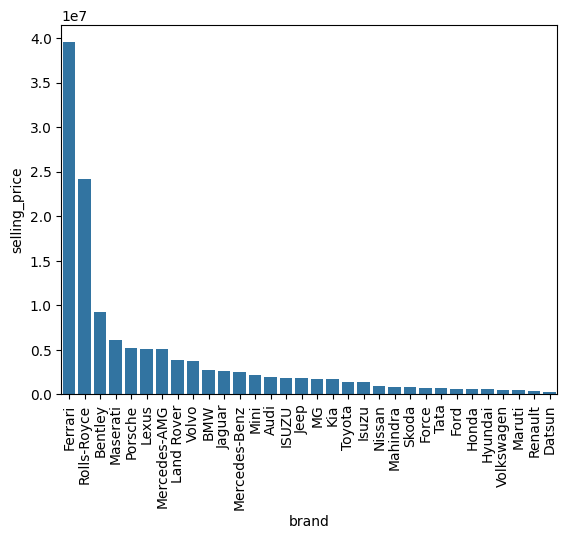

In [36]:
sns.barplot(brand_price)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, 'Maruti'),
  Text(1, 0, 'Datsun'),
  Text(2, 0, 'Renault'),
  Text(3, 0, 'Hyundai'),
  Text(4, 0, 'Mahindra'),
  Text(5, 0, 'Skoda'),
  Text(6, 0, 'Ford'),
  Text(7, 0, 'Tata'),
  Text(8, 0, 'Volkswagen'),
  Text(9, 0, 'Honda'),
  Text(10, 0, 'Force'),
  Text(11, 0, 'Toyota'),
  Text(12, 0, 'Mini'),
  Text(13, 0, 'Nissan'),
  Text(14, 0, 'Kia'),
  Text(15, 0, 'Audi'),
  Text(16, 0, 'Isuzu'),
  Text(17, 0, 'MG'),
  Text(18, 0, 'Land Rover'),
  Text(19, 0, 'BMW'),
  Text(20, 0, 'Mercedes-Benz'),
  Text(21, 0, 'Jeep'),
  Text(22, 0, 'Volvo'),
  Text(23, 0, 'ISUZU'),
  Text(24, 0, 'Jaguar'),
  Text(25, 0, 'Lexus'),
  Text(26, 0, 'Porsche'),
  Text(27, 0, 'Maserati'),
  Text(28, 0, 'Mercedes-AMG'),
  Text(29, 0, 'Bentley'),
  Text(30, 0, 'Rolls-Royce'),
  Text(31, 0, 'Ferrari')])

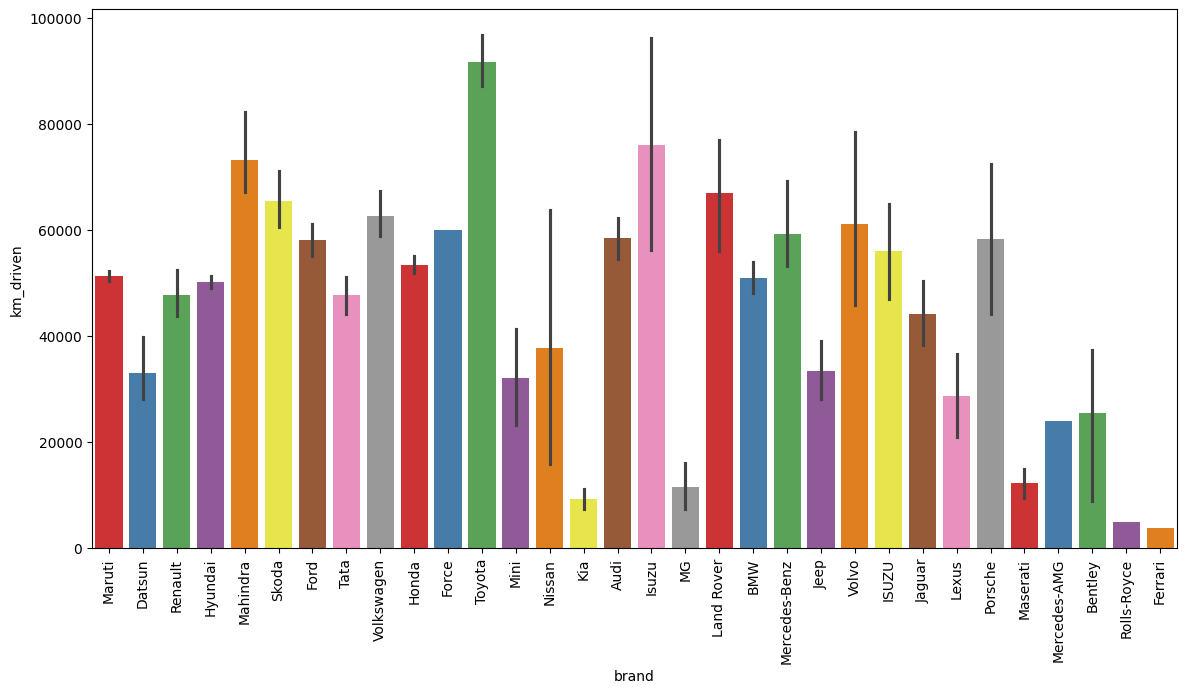

In [37]:
plt.figure(figsize=(14,7))
sns.barplot(x=df['brand'], y= df['km_driven'], palette="Set1")
plt.xticks(rotation=90)



In [38]:
# fuel type vs selling price
fuel = df.groupby('fuel_type')['selling_price'].median().sort_values(ascending=False)
fuel.to_frame()

,selling_price
fuel_type,
Electric,1857500.0
Diesel,700000.0
Petrol,460000.0
CNG,370000.0
LPG,182500.0


Text(0, 0.5, 'selling_price in Lakhs')

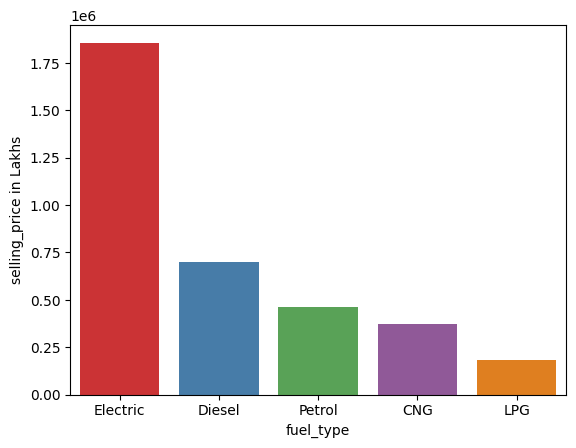

In [39]:
sns.barplot(x = fuel.index, y=fuel.values, palette="Set1")
plt.ylabel("selling_price in Lakhs")

<Axes: xlabel='fuel_type', ylabel='count'>

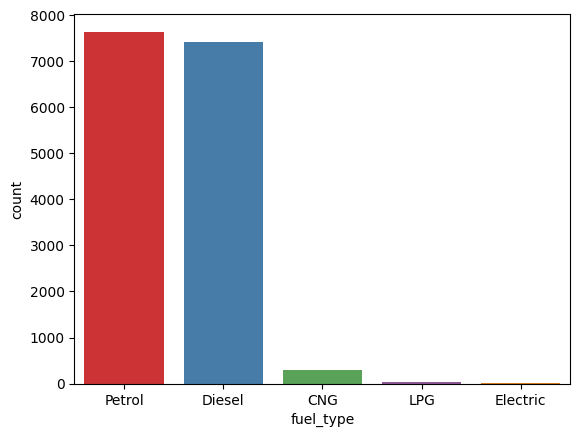

In [40]:
# most sold fuel type
sns.countplot(x=df['fuel_type'], palette='Set1', order=df['fuel_type'].value_counts().sort_values(ascending=False).index)

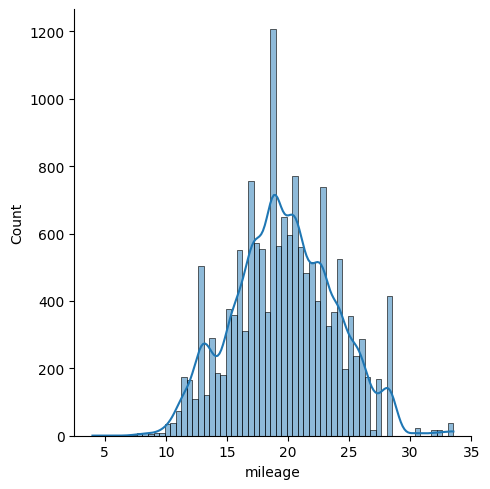

In [41]:
sns.displot(df["mileage"], kde=True)

In [42]:
# Fuel type vs Mileage
fuel_mileage = df.groupby('fuel_type')['mileage'].mean().sort_values(ascending=False)

fuel_mileage.to_frame()

,mileage
fuel_type,
CNG,25.814651
Diesel,20.060030
Electric,19.160000
Petrol,19.123045
LPG,17.836364


Text(0, 0.5, 'mileage')

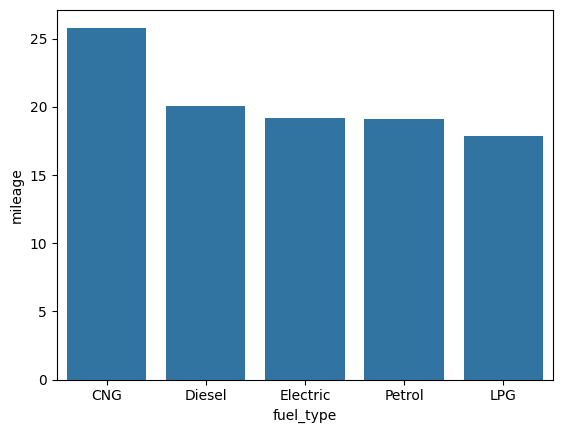

In [43]:
sns.barplot(x=fuel_mileage.index, y=fuel_mileage.values)
plt.ylabel("mileage")

<Axes: xlabel='fuel_type', ylabel='mileage'>

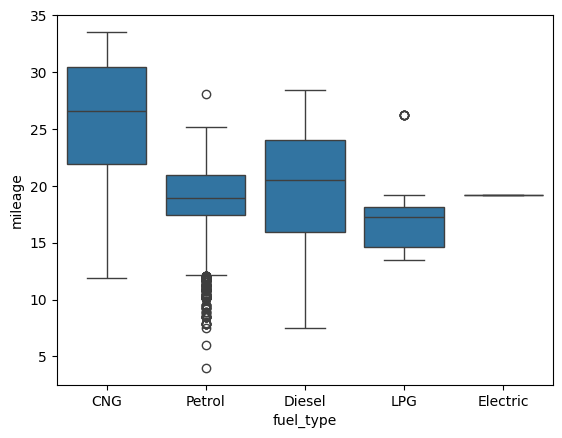

In [44]:
sns.boxplot(x= 'fuel_type', y='mileage', data = df)

(10.0, 22.0)

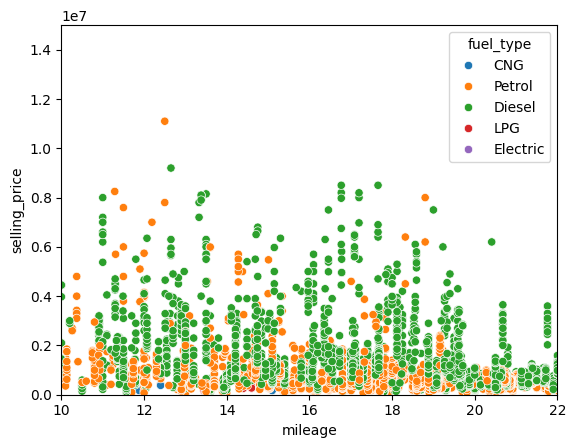

In [45]:
# mileage vs selling price
sns.scatterplot(x= 'mileage', y= 'selling_price', data=df,hue='fuel_type')
plt.ylim(0,15000000)
plt.xlim(10,22)

# Mileage distribution

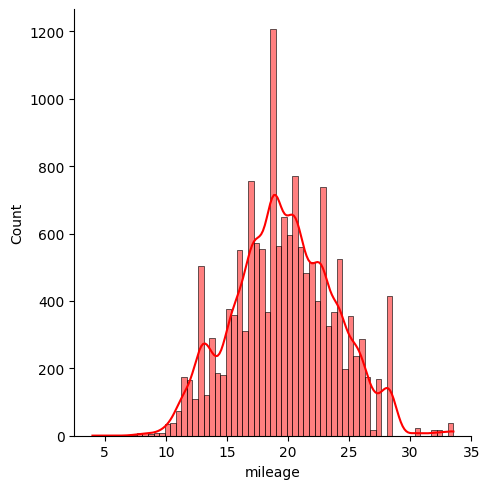

In [46]:
sns.displot(x= 'mileage',data=df, kde= True, color="red")

# vehicle age vs selling price

<Axes: xlabel='vehicle_age', ylabel='selling_price'>

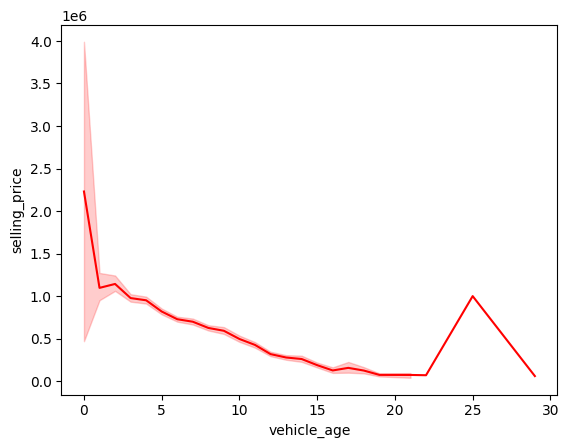

In [47]:
sns.lineplot(x= 'vehicle_age', y= 'selling_price', data=df, color= 'red')


# vehicle age vs mileage


In [48]:
vehicle_age =  df.groupby('vehicle_age')['mileage'].median().sort_values(ascending=False)
vehicle_age.to_frame().head()

,mileage
vehicle_age,
29,22.05
0,21.70
3,21.21
4,20.63
5,20.51


<Axes: xlabel='vehicle_age', ylabel='mileage'>

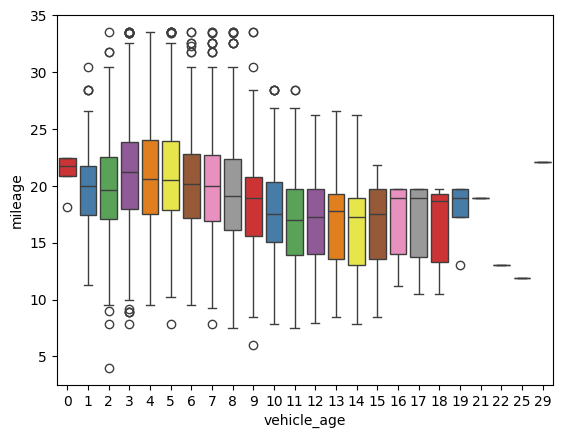

In [49]:
plt.subplots(figure=(14,7))
sns.boxplot(x=df['vehicle_age'], y=df['mileage'], palette='Set1')

# transmission type vs selling price

<Axes: xlabel='transmission_type', ylabel='selling_price'>

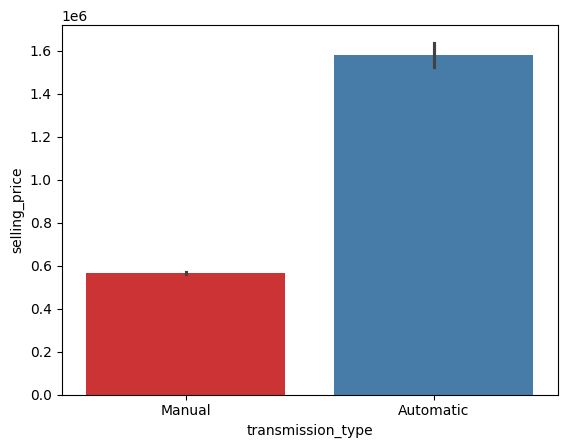

In [50]:
plt.subplots(figure=(14,7))
sns.barplot(x=df['transmission_type'], y=df['selling_price'], data=df, palette="Set1")


# transmission type vs mileage

<Axes: xlabel='transmission_type', ylabel='mileage'>

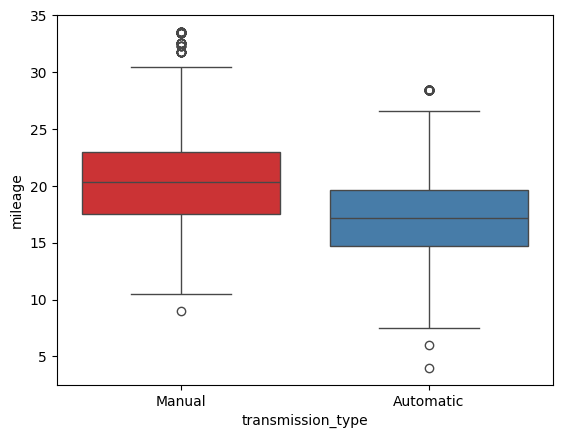

In [51]:
plt.subplots(figure=(14,7))
sns.boxplot(x=df['transmission_type'], y=df['mileage'], data=df, palette="Set1")


# transmission type vs count

<Axes: xlabel='transmission_type', ylabel='count'>

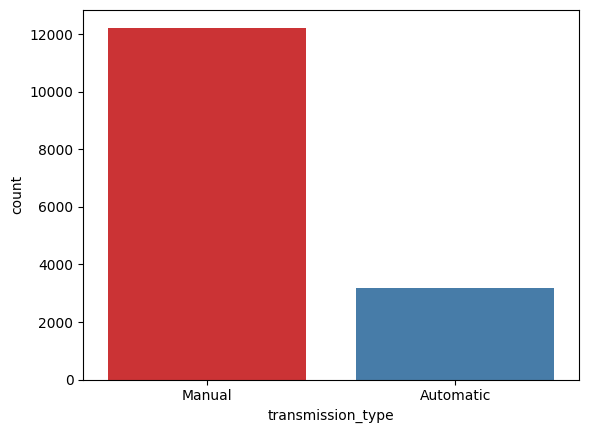

In [52]:
plt.subplots(figure=(14,7))
sns.countplot(x='transmission_type', data=df, palette="Set1")


# seller type vs count

<Axes: xlabel='seller_type', ylabel='count'>

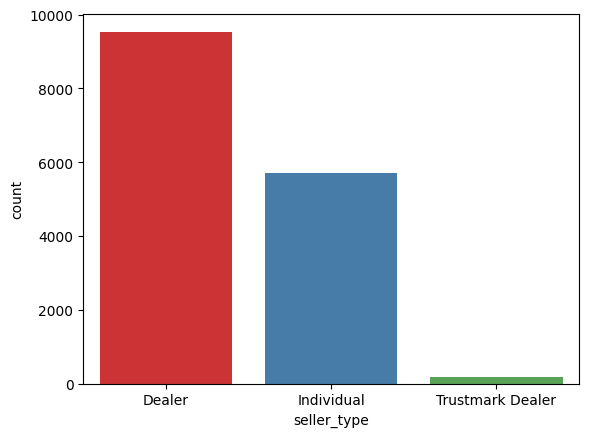

In [53]:
plt.subplots(figure=(14,7))
sns.countplot(x='seller_type', data=df, palette="Set1")


# seller type vs selling price

In [54]:
dealer = df.groupby('seller_type')['selling_price'].median().sort_values(ascending=False)
dealer.to_frame()

,selling_price
seller_type,
Dealer,591000.0
Trustmark Dealer,540000.0
Individual,507000.0


Text(0, 0.5, 'Median Selling Price')

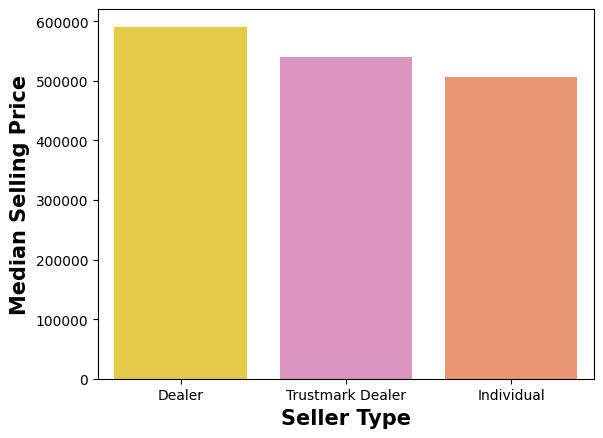

In [55]:
plt.subplots(figure=(14,7))
sns.barplot(x=dealer.index, y =dealer.values,palette="Set2_r")
plt.xlabel("Seller Type", weight="bold", fontsize= 15)
plt.ylabel("Median Selling Price", weight="bold", fontsize= 15)

#### Observation
- dealers are giving more price valuation than others.

# Final report


- The datatypes and columns names were right and there was 15411 rows and 13 columns.
- The selling price column is the target to predict i.e. Regression Problem
- There are outliers in the km_driven, engine, selling_price and max power
- Dealers are the highest sellers of the used cars.
- Skewness were found in few columns will be checked after handling the oultiers.
- vehicle age have negative effect on price.
- Manual cars are mostly sold and automatic cars has higher selling average than manual cars.
- Petrol is the most preffered vehicle of the fuel in used cars dataset, followed by diesel and LPG.

# Feature engineering

# Checking the Outliers


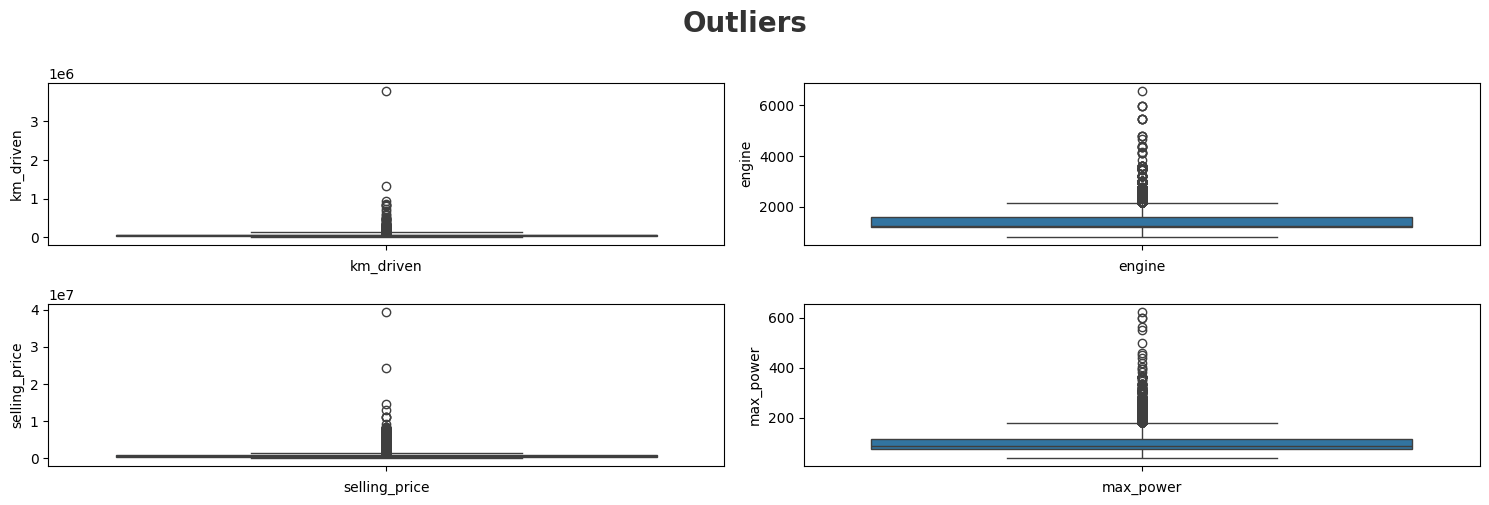

In [56]:
plt.figure(figsize=(15,5))
plt.suptitle("Outliers", fontsize=20, fontweight="bold",alpha=0.8,y=1)

outliers= ['km_driven', 'engine', 'selling_price','max_power']
# outliers= numeric_features
for i in range(len(outliers)):
    #plt.subplot(4,2,i+1)
    plt.subplot(2,2,i+1)
    sns.boxplot(df[outliers[i]])
    plt.xlabel(outliers[i])
    plt.tight_layout()

# Outlier detection and removal using IQR

In [57]:
total_number_of_outliers_detected = []
outliers= ['km_driven', 'engine', 'selling_price','max_power']

def outlier_detection_and_removal(df1, col_name):

  print("-------------------------------------------------------------------------------\n")
  print(col_name)
  print()
  print()
  Q1 = df1[col_name].quantile(0.25)
  Q3 = df1[col_name].quantile(0.75)

  print(f"Q1={Q1}, Q3={Q3}")

  IQR = Q3 - Q1
  print(f"IQR={IQR}")

  lower_limit = Q1 - 1.5*IQR
  upper_limit = Q3 + 1.5*IQR
  print(f"lower_limit= {lower_limit}, upper_limit = {upper_limit}")

  outlier_detected = df1[(df1[col_name]<lower_limit) | (df1[col_name]>upper_limit)]
  total_number_of_outliers_detected.append(len(outlier_detected))
  #print(outlier_detected)

  df1 = df1[(df1[col_name]>=lower_limit) & (df1[col_name]<=upper_limit)] # outliers removed from each column
  return df1
  #print(df1)

df1 = df.copy()
for i in outliers:

  df1 = outlier_detection_and_removal(df1, i)
  print(df1)

print(total_number_of_outliers_detected,": total outliers=>",sum(total_number_of_outliers_detected))



-------------------------------------------------------------------------------

km_driven


Q1=30000.0, Q3=70000.0
IQR=40000.0
lower_limit= -30000.0, upper_limit = 130000.0
       Unnamed: 0             car_name        brand        model  vehicle_age  \
0               1          Maruti Alto       Maruti         Alto            9   
1               2          Maruti Alto       Maruti         Alto           11   
2               3          Maruti Alto       Maruti         Alto           11   
3               4          Maruti Alto       Maruti         Alto           10   
4               5          Maruti Alto       Maruti         Alto           11   
...           ...                  ...          ...          ...          ...   
15406       30016  Bentley Continental      Bentley  Continental           10   
15407       30017    Rolls-Royce Ghost  Rolls-Royce        Ghost            4   
15408       30018  Bentley Continental      Bentley  Continental            9   
15409       3001

In [58]:
df1.to_csv("cleaned_data.csv", index=False)

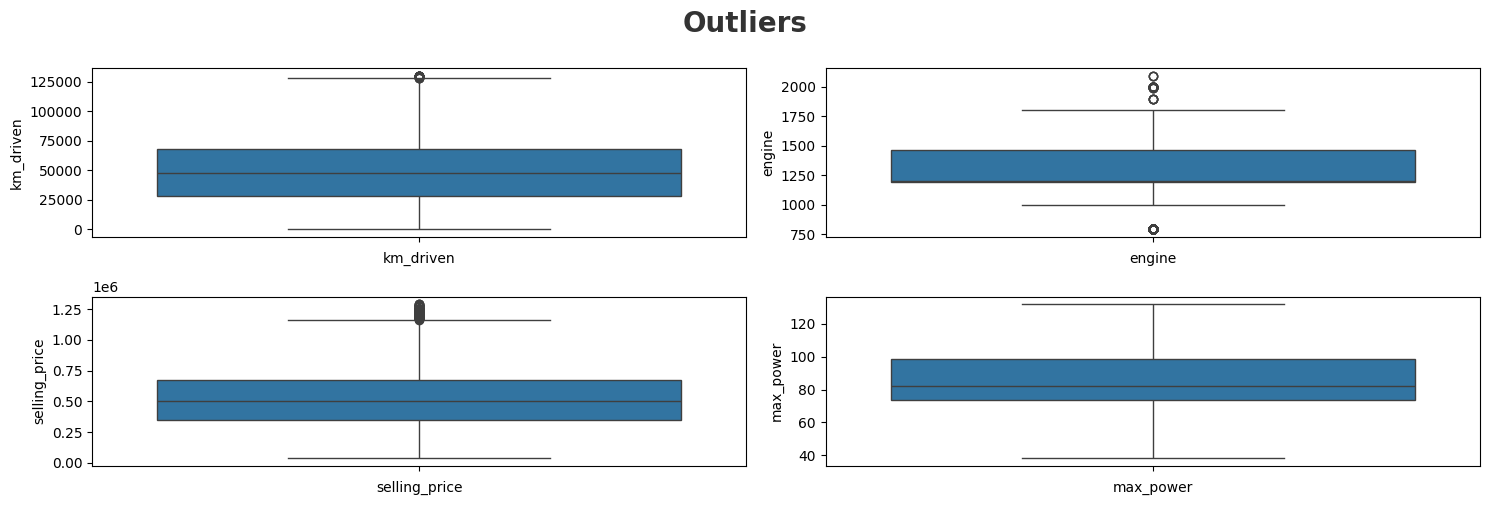

In [59]:
plt.figure(figsize=(15,5))
plt.suptitle("Outliers", fontsize=20, fontweight="bold",alpha=0.8,y=1)

outliers= ['km_driven', 'engine', 'selling_price','max_power']
# outliers= numeric_features
for i in range(len(outliers)):
    #plt.subplot(4,2,i+1)
    plt.subplot(2,2,i+1)
    sns.boxplot(df1[outliers[i]])
    plt.xlabel(outliers[i])
    plt.tight_layout()